<H2>Cached Combination Results</H2>

Load combinations and envelopes can take a long time to compute, especially with complex nested loadsets over multiple analyses.
Modeller contains a results cache such that it can cache the results of these post-processed loadsets. This cache can be set up to automatically calculate specific results or we can simply request the results in loop and have them cached whilst the computer is idle. This is an example of the latter, but the former is generally a more performant option

In [3]:
import win32com.client as win32
lusas = win32.gencache.EnsureDispatch("Lusas.Modeller.21.0")
db = lusas.getDatabase()

With the model displaying contours of the results of interest we'll loop through our design combinations setting active each loadset to request the results be generated. Modeller will then cache the computed results making them much quicker to access

In [ ]:
entity = "Displacement"
components = ["DZ"]

# Make sure modeller is displaying some results otherwise they will not be calculated
lusas.view().insertContoursLayer()
lusas.view().contours().setResults(entity, components[0])

# It's important to set the required results transformation (although its technically notr required for displacements as that is always in global axes)
lusas.view().setResultsTransformGlobal() 

Define the loadsets (Basic/Smart Combinations, Envelopes etc). We'll just loop through them and trigger the calculation by displaying them to screen, having the results automatically cached

In [4]:
loadsets = ["SLS QP - P10 WL (S1)_101", 
            "SLS QP - P10 WL (S2)_101", 
            "SLS QP - P10 WL (S1)_102", 
            "SLS QP - P10 WL (S2)_102", 
            "SLS QP - P10 WL (S1)_103", 
            "SLS QP - P10 WL (S2)_103", 
            "SLS QP - P10 WL (S1)_104", 
            "SLS QP - P10 WL (S2)_104",
            "SLS QP - P10 WL (S1)_105", 
            "SLS QP - P10 WL (S2)_105"]

for loadset in loadsets:

    ls = db.getLoadset(loadset)

    for component in components:

        if ls.getTypeCode() == 2 or ls.getTypeCode() == 6:

            for max_min in ["(Max)", "(Min)"]:
                lusas.view().setActiveLoadsetAssocVal(entity, component, f"{loadset} {max_min}")
        else:
            lusas.view().setActiveLoadset(loadset)

The results cache in the treeview should now show that its storing some results

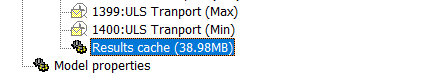